In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn
import seaborn as sns
from numpy import where
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
X = pd.read_csv('CryptoFortress.csv')

#X.drop(X.tail(30000).index,inplace=True)

X.drop(["No."], axis=1, inplace=True)
X = X.head(1000)

In [3]:
# List of the column names with nominal features that should be one-hot encoded
onehot_features = ['Source', 'Destination', 'Protocol', 'Info']

# One-hot encode these features 
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False) # we want a non-sparse matrix for concatenation
encoded = onehot.fit_transform(X[onehot_features])
encoded = pd.DataFrame(encoded) # the output of the encoding is a NumPy array, but we want it as a Pandas DataFrame

# One-hot encoding produces an output with more columns than the input, so we can't just reassign the output to X. 
# There are a few ways to put the encoded features in the original dataframe, but none of them are that elegant, so we'll just drop the old columns and concatenate the new
X.drop(onehot_features, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

# print encoded X for inspection
print(X.head(5))

       Time  Length    0    1    2    3    4    5    6    7  ...  679  680  \
0  0.000000      42  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.000813      78  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.001054      70  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.001205      90  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.001548     145  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   681  682  683  684  685  686  687  688  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 691 columns]


In [15]:
pca = PCA(2)
X1 = pca.fit_transform(X)

[9.99676326e-01 3.15063990e-04]


In [19]:
clf = OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.03).fit(X1)
pred = clf.predict(X1)

In [20]:
anom_index = where(pred==-1)
values = X1[anom_index]

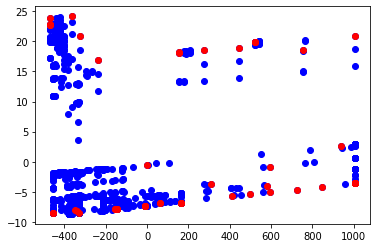

In [21]:
plt.scatter(X1[:,0], X1[:,1], color='b')
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()